<a href="https://colab.research.google.com/github/EldaCalderon/DataWork/blob/main/Pricing_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRICING TEST

In [35]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv("/content/dataset.csv", sep=";")

# Cleaning & Transfomations

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [38]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2099.333529
std,4.652502,0.051459,62.086938,8.371664,1542.432736
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,878.856000
50%,12.600000,0.054021,142.247000,1999.000000,1828.273367
75%,16.750000,0.094037,185.855600,2004.000000,2949.298043
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Null Values

In [39]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
2439 / data["Item_Weight"].shape[0]

0.17171219374823993

In [41]:
4016 / data["Outlet_Size"].shape[0]

0.28273725711067305

In [42]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2349.547110
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958


array([[<AxesSubplot:title={'center':'Item_Weight'}>]], dtype=object)

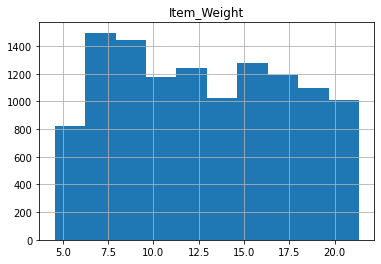

In [43]:
data.hist(column = "Item_Weight")

17% of missing values at Item Weight. I will apply imputation with mean
28% of missing values at Outlet Size. Due it is almost a third of missing values I won't consider this variable in the analysis

In [44]:
# Applying imputation

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)


In [45]:
data2 = data.drop("Outlet_Size", axis='columns')

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.2+ MB


## Categorical Variables Transformations

In [46]:
# Fat Content
# It's possible identify 2 categories in Item Fat: Low Fat and Regular
data2["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [47]:
data2["Item_Fat_Content"][data2["Item_Fat_Content"] == 'low fat'] = 'Low Fat'

<ipython-input-47-f94bb8a34bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Item_Fat_Content"][data2["Item_Fat_Content"] == 'low fat'] = 'Low Fat'


In [48]:
data2["Item_Fat_Content"][data2["Item_Fat_Content"] == 'LF'] = 'Low Fat'

<ipython-input-48-3057a5222d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Item_Fat_Content"][data2["Item_Fat_Content"] == 'LF'] = 'Low Fat'


In [49]:
data2["Item_Fat_Content"][data2["Item_Fat_Content"] == 'reg'] = 'Regular'

<ipython-input-49-61029166ddcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Item_Fat_Content"][data2["Item_Fat_Content"] == 'reg'] = 'Regular'


In [50]:
data2["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [51]:
# Item Type
data2["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [52]:
# Outlet_Location_Type
data2["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [53]:
# Outlet_Type
data2["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [54]:
# Categorical transformation in variables Item Fat Content, Item Type, Outlet Location Type, Outlet Type

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit_transform(data2["Item_Fat_Content"])

array([0, 1, 0, ..., 0, 1, 1])

In [55]:
data3 = pd.get_dummies(data2, columns = ["Item_Fat_Content", "Item_Type"])

In [56]:
data4 = data3
data4["Outlet_Location_Type"] = label_encoder.fit_transform(data3["Outlet_Location_Type"])

In [57]:
data4["Outlet_Type"] = label_encoder.fit_transform(data4["Outlet_Type"])

In [58]:
data4.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,0,1,3735.1380,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,0,1,2097.2700,1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,2,1,994.7052,1,...,0,0,0,1,0,0,0,0,0,0


# Exploratory Analysis

(array([ 820., 1496., 1440., 1176., 3683., 1022., 1275., 1189., 1094.,
        1009.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

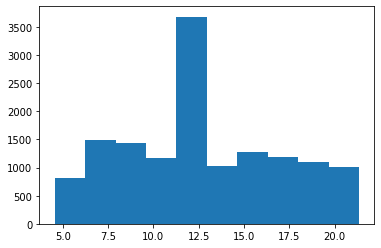

In [59]:
plt.hist(data4["Item_Weight"])

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

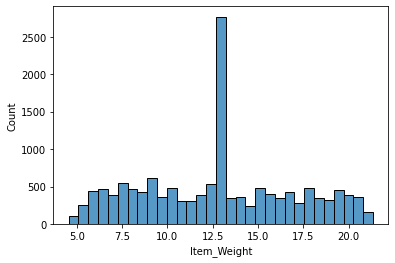

In [60]:
sns.histplot(data=data4, x="Item_Weight")

<AxesSubplot:ylabel='Density'>

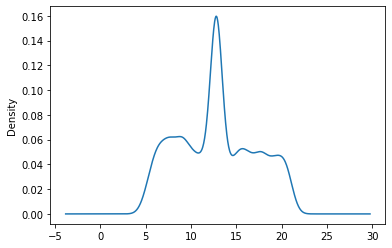

In [61]:
data4["Item_Weight"].plot.density()

<AxesSubplot:ylabel='Density'>

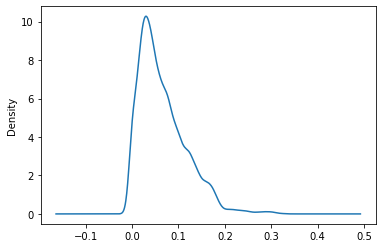

In [62]:
data4["Item_Visibility"].plot.density()

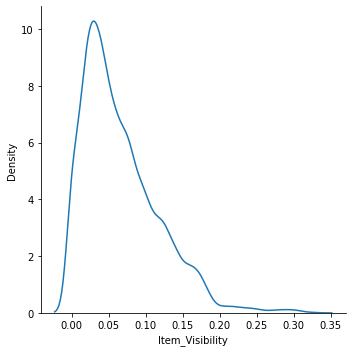

In [99]:
sns.displot(data4, x="Item_Visibility", kind="kde")

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

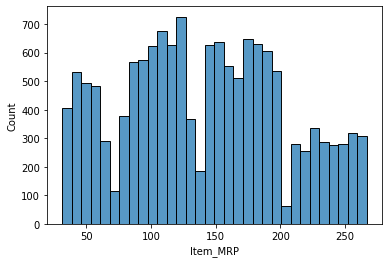

In [100]:
sns.histplot(data=data4, x="Item_MRP")

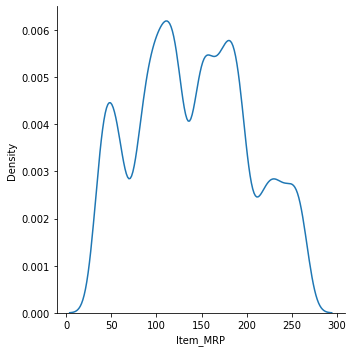

In [101]:
sns.displot(data4, x="Item_MRP", kind="kde")

<AxesSubplot:ylabel='Density'>

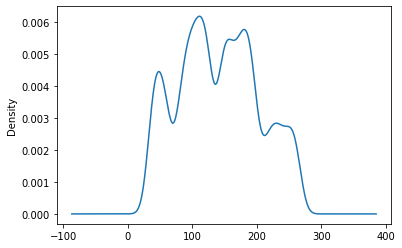

In [64]:
data4["Item_MRP"].plot.density()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Count'>

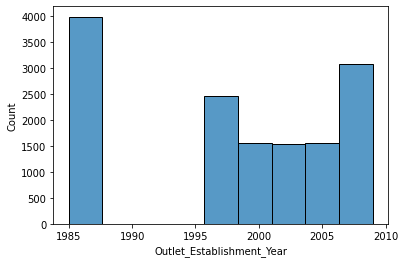

In [110]:
sns.histplot(data=data4, x="Outlet_Establishment_Year", bins = 9)

In [125]:
data.groupby('Outlet_Location_Type')['Outlet_Identifier'].count().unique().sort_values(ascending=False).plot(kind='bar')

AttributeError: ignored

<AxesSubplot:xlabel='Outlet_Location_Type'>

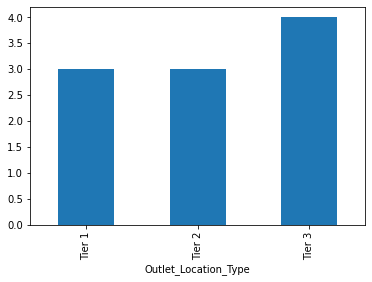

In [138]:
data.groupby('Outlet_Location_Type')['Outlet_Identifier'].nunique().plot(kind='bar')


Text(0.5, 1.0, 'Transactions by Outlet type')

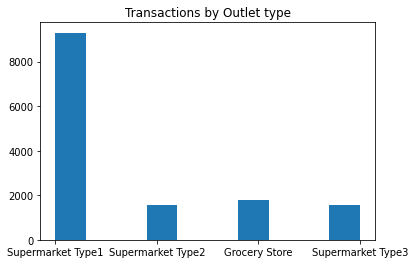

In [144]:
plt.hist(data2["Outlet_Type"])
plt.title("Transactions by Outlet type")

In [140]:
9294 / 14204

0.6543227259926782

<AxesSubplot:xlabel='Outlet_Type'>

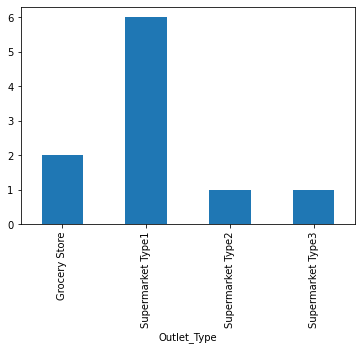

In [139]:
data.groupby('Outlet_Type')['Outlet_Identifier'].nunique().plot(kind='bar')

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, ylabel='Density'>

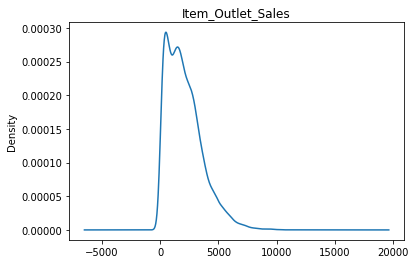

In [150]:
data4["Item_Outlet_Sales"].plot.density(title="Item_Outlet_Sales")

In [69]:
data4

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,0,1,3735.138000,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,2,2,443.422800,0,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,0,1,2097.270000,1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,2,0,732.380000,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,2,1,994.705200,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,1997,0,1,2213.476465,0,...,0,0,0,0,0,0,0,1,0,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,2009,2,2,2349.547110,0,...,0,0,0,0,0,0,0,0,0,1
14201,NCO17,10.00,0.073529,118.7440,OUT045,2002,1,1,1892.981544,1,...,0,0,1,0,0,0,0,0,0,0
14202,FDJ26,15.30,0.000000,214.6218,OUT017,2007,1,1,4533.564958,0,...,0,0,0,0,0,0,0,0,0,0


## Correlation

In [70]:
data5 = data4.drop(["Item_Identifier", "Outlet_Identifier"], axis='columns')


In [71]:
data4.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
Item_Weight,1.000000,-0.013641,0.033002,0.000462,-0.002104,0.001699,0.021600,0.030101,-0.030101,-0.029152,...,0.031914,-0.038895,0.018775,0.037377,-0.001218,0.030623,-0.000501,0.005772,-0.045730,0.024005
Item_Visibility,-0.013641,1.000000,-0.006351,-0.083678,-0.017362,-0.165726,-0.134118,-0.044274,0.044274,0.010875,...,0.020672,-0.000757,-0.047416,-0.042387,-0.029327,-0.024617,0.007884,0.010374,-0.003016,0.003616
Item_MRP,0.033002,-0.006351,1.000000,0.000141,0.000838,0.000136,0.602297,0.004019,-0.004019,-0.062781,...,0.021594,-0.009664,-0.032251,0.043553,-0.002688,-0.016582,0.000363,0.035457,-0.020939,0.019575
Outlet_Establishment_Year,0.000462,-0.083678,0.000141,1.000000,-0.089328,-0.122519,-0.054176,-0.000137,0.000137,-0.000162,...,-0.001161,0.002364,-0.001367,0.001541,-0.002291,-0.003545,-0.001272,0.002854,0.001334,0.004291
Outlet_Location_Type,-0.002104,-0.017362,0.000838,-0.089328,1.000000,0.467251,0.100386,-0.001373,0.001373,0.000469,...,0.000949,0.002829,-0.001393,0.001473,-0.000024,-0.003489,-0.002244,0.001630,0.000813,0.002950
Outlet_Type,0.001699,-0.165726,0.000136,-0.122519,0.467251,1.000000,0.435849,0.000228,-0.000228,-0.000197,...,-0.002326,0.001198,0.000483,-0.000166,-0.004443,-0.004043,0.002337,0.005005,0.001954,0.004445
Item_Outlet_Sales,0.021600,-0.134118,0.602297,-0.054176,0.100386,0.435849,1.000000,-0.011056,0.011056,-0.037788,...,0.021320,-0.009703,-0.018764,0.018474,0.001423,-0.014852,0.012828,0.022922,-0.014586,0.015971
Item_Fat_Content_Low Fat,0.030101,-0.044274,0.004019,-0.000137,-0.001373,0.000228,-0.011056,1.000000,-1.000000,-0.088826,...,-0.091092,0.119543,0.187429,0.258527,-0.128862,0.104825,-0.008496,-0.061620,0.098667,-0.018313
Item_Fat_Content_Regular,-0.030101,0.044274,-0.004019,0.000137,0.001373,-0.000228,0.011056,-1.000000,1.000000,0.088826,...,0.091092,-0.119543,-0.187429,-0.258527,0.128862,-0.104825,0.008496,0.061620,-0.098667,0.018313
Item_Type_Baking Goods,-0.029152,0.010875,-0.062781,-0.000162,0.000469,-0.000197,-0.037788,-0.088826,0.088826,1.000000,...,-0.116919,-0.046530,-0.072954,-0.100628,-0.067262,-0.040802,-0.022847,-0.116105,-0.066779,-0.039976


In [151]:
data4.corr()[['Item_Outlet_Sales']].sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Outlet_Sales
Item_Outlet_Sales,1.000000
Item_MRP,0.602297
Outlet_Type,0.435849
Outlet_Location_Type,0.100386
Item_Type_Snack Foods,0.022922
Item_Weight,0.021600
Item_Type_Fruits and Vegetables,0.021320
Item_Type_Household,0.018474
Item_Type_Starchy Foods,0.015971
Item_Type_Seafood,0.012828


Text(0.5, 1.0, 'Features Correlating with Item_Outlet_Sales')

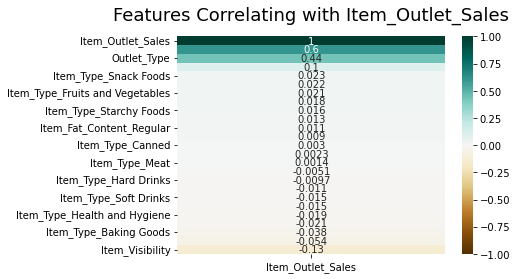

In [73]:
mapa_calor = sns.heatmap(data4.corr()[['Item_Outlet_Sales']].sort_values(by='Item_Outlet_Sales', ascending=False),vmin=-1, vmax=1, annot=True, cmap='BrBG')
mapa_calor.set_title('Features Correlating with Item_Outlet_Sales', fontdict={'fontsize':18}, pad=16)

Variables with a certain correlation with Outlet Sales:
- Item MRP
- Outlet type


<AxesSubplot:title={'center':'Scatterplot Item Outlet Sales - Item MRP'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

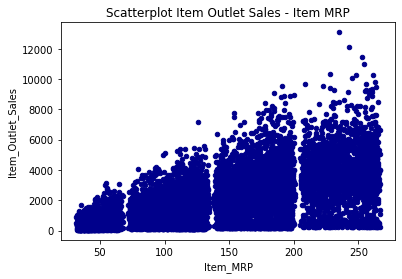

In [153]:
data5.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales', c='DarkBlue', title ="Scatterplot Item Outlet Sales - Item MRP")

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='Outlet_Type'>

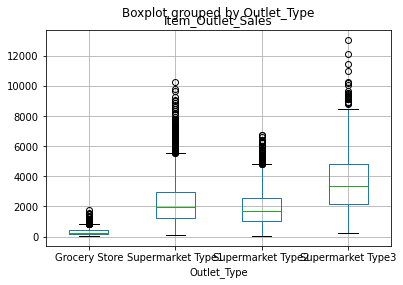

In [75]:
data.boxplot(column=['Item_Outlet_Sales'], by='Outlet_Type')

In [76]:
data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        5.823266e+05
Supermarket Type1    2.065187e+07
Supermarket Type2    2.979587e+06
Supermarket Type3    5.605150e+06
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:title={'center':'Sales by Outlet Type'}, xlabel='Outlet_Type'>

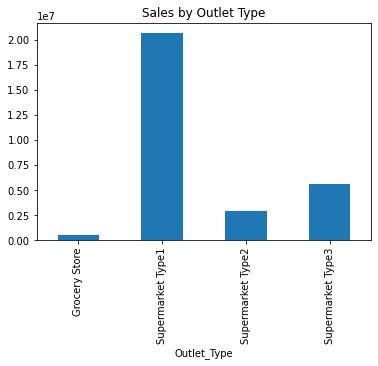

In [156]:
data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().plot(kind='bar', title = "Sales by Outlet Type")

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

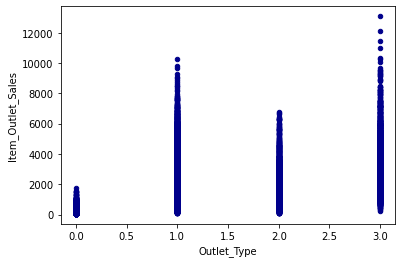

In [78]:
data5.plot.scatter(x='Outlet_Type', y='Item_Outlet_Sales', c='DarkBlue')

In [79]:
# Items type most selled in Supermarket Type 1

tipo1 = data[data["Outlet_Type"] == "Supermarket Type1"]
tipo1.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)


Item_Type
Snack Foods              3.020906e+06
Fruits and Vegetables    3.003983e+06
Household                2.332425e+06
Frozen Foods             1.983297e+06
Dairy                    1.683132e+06
Canned                   1.598219e+06
Baking Goods             1.439524e+06
Health and Hygiene       1.176848e+06
Meat                     1.062367e+06
Soft Drinks              1.009075e+06
Breads                   6.108937e+05
Hard Drinks              5.151442e+05
Starchy Foods            4.373593e+05
Others                   3.792442e+05
Breakfast                2.501660e+05
Seafood                  1.492885e+05
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:title={'center':'Sales by Item Type in Supermarket Type 1'}, xlabel='Item_Type'>

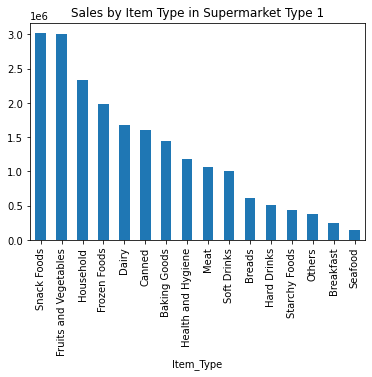

In [161]:
tipo1.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar', title = "Sales by Item Type in Supermarket Type 1")

In [81]:
mrp = data[data["Item_MRP"] > 150]
mrp.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)


Item_Type
Fruits and Vegetables    2.839887e+06
Snack Foods              2.796349e+06
Household                2.311128e+06
Frozen Foods             1.744945e+06
Dairy                    1.711249e+06
Canned                   1.404195e+06
Baking Goods             1.138649e+06
Meat                     1.023527e+06
Soft Drinks              9.801671e+05
Health and Hygiene       9.363553e+05
Breads                   5.590564e+05
Hard Drinks              4.752281e+05
Starchy Foods            4.694939e+05
Others                   3.111547e+05
Breakfast                2.725904e+05
Seafood                  1.566545e+05
Name: Item_Outlet_Sales, dtype: float64

In [82]:
data.groupby('Outlet_Type')['Outlet_Type'].count()

Outlet_Type
Grocery Store        1805
Supermarket Type1    9294
Supermarket Type2    1546
Supermarket Type3    1559
Name: Outlet_Type, dtype: int64

- While higher MRP more sales
- Supermarket type 1 generates the most sales
- Supermarket type 1 is the biggest with 9294 transactions
- Items types most selled in supermarket type 1: snacks, F&V, Household

### Outlet to be closed

In [83]:
data4['Item_Outlet_Sales'].sum()

29818933.45222725

<AxesSubplot:title={'center':'Sales by Outlet'}, xlabel='Outlet_Identifier'>

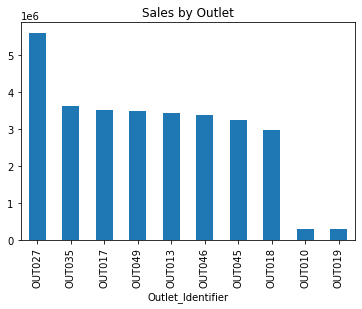

In [160]:
data4.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar', title = "Sales by Outlet")


In [85]:
data4.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=True) / data4['Item_Outlet_Sales'].sum() * 100

Outlet_Identifier
OUT019     0.950077
OUT010     1.002799
OUT018     9.992267
OUT045    10.872423
OUT046    11.304258
OUT013    11.464548
OUT049    11.722847
OUT017    11.796335
OUT035    12.097162
OUT027    18.797285
Name: Item_Outlet_Sales, dtype: float64

I will recommend outlet OUT019 and OUT010 because the sales of each one  represents only 1% of total sales

### Products Recommendations

<AxesSubplot:title={'center':'Sales by Item Type'}, xlabel='Item_Type'>

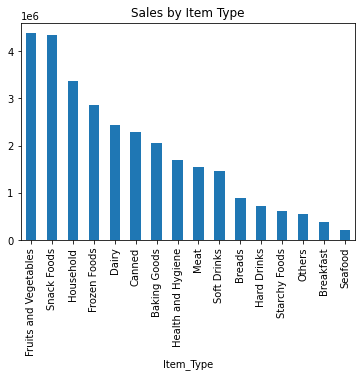

In [163]:
data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar', title = "Sales by Item Type")

In [87]:
data6 = data.assign(Quantity=data["Item_Outlet_Sales"] / data["Item_MRP"])

In [88]:
fv = data6[data6['Item_Type'] == "Fruits and Vegetables"]

In [89]:
fv.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

Item_Identifier
FDY55    46933.227805
FDZ20    42978.848434
FDU55    42937.813612
FDD44    42339.080157
FDS44    38237.297131
             ...     
FDD08     4831.067567
FDV43     4767.246534
FDR43     4747.304026
FDE32     4104.479252
FDF09     3834.628701
Name: Item_Outlet_Sales, Length: 220, dtype: float64

In [165]:
fv[fv["Item_Identifier"] == "FDU55"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity
332,FDU55,16.200000,Low Fat,0.035984,Fruits and Vegetables,260.6278,OUT045,2002,NaN,Tier 2,Supermarket Type1,4425.572600,16.980432
1755,FDU55,16.200000,Low Fat,0.036058,Fruits and Vegetables,260.3278,OUT018,2009,Medium,Tier 3,Supermarket Type2,2342.950200,9.000000
2109,FDU55,12.792854,Low Fat,0.035737,Fruits and Vegetables,260.6278,OUT027,1985,Medium,Tier 3,Supermarket Type3,9371.800800,35.958562
8245,FDU55,16.200000,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.506200,29.000000
10848,FDU55,16.200000,Low Fat,0.035881,Fruits and Vegetables,260.4278,OUT013,1987,High,Tier 3,Supermarket Type1,5909.466515,22.691381
11876,FDU55,16.200000,Low Fat,0.035904,Fruits and Vegetables,258.6278,OUT035,2004,Small,Tier 2,Supermarket Type1,4829.605804,18.673962
13537,FDU55,16.200000,Low Fat,0.036114,Fruits and Vegetables,258.8278,OUT017,2007,NaN,Tier 2,Supermarket Type1,4128.186407,15.949548
14180,FDU55,16.200000,Low Fat,0.035911,Fruits and Vegetables,261.3278,OUT046,1997,Small,Tier 1,Supermarket Type1,4380.725086,16.763334


In [91]:
snack = data6[data6['Item_Type'] == "Snack Foods"]

In [92]:
snack.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

Item_Identifier
FDL57    40799.458294
FDC47    39370.537413
FDR34    39222.134477
FDN58    38176.181195
FDR45    37561.214155
             ...     
FDG22     4534.936554
FDQ22     4132.079531
FDS22     4060.090741
FDU21     3992.819866
FDX10     2733.134807
Name: Item_Outlet_Sales, Length: 220, dtype: float64

In [168]:
snack[snack["Item_Identifier"] == "FDR34"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity
1608,FDR34,17.000000,Regular,0.015965,Snack Foods,229.4352,OUT046,1997,Small,Tier 1,Supermarket Type1,4809.739200,20.963388
3723,FDR34,17.000000,Regular,0.015998,Snack Foods,229.1352,OUT045,2002,NaN,Tier 2,Supermarket Type1,4580.704000,19.991272
5720,FDR34,17.000000,Regular,0.015990,Snack Foods,228.8352,OUT049,1999,Medium,Tier 1,Supermarket Type1,4351.668800,19.016606
7076,FDR34,17.000000,Regular,0.016056,Snack Foods,228.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,8245.267200,36.094556
8199,FDR34,17.000000,Regular,0.016030,Snack Foods,228.0352,OUT018,2009,Medium,Tier 3,Supermarket Type2,2748.422400,12.052623
9771,FDR34,17.000000,Regular,0.015952,Snack Foods,227.3352,OUT013,1987,High,Tier 3,Supermarket Type1,4309.380352,18.956063
9831,FDR34,17.000000,Regular,0.015962,Snack Foods,230.8352,OUT035,2004,Small,Tier 2,Supermarket Type1,4371.961931,18.939754
10026,FDR34,12.792854,Regular,0.015888,Snack Foods,228.6352,OUT027,1985,Medium,Tier 3,Supermarket Type3,5313.174360,23.238654
10054,FDR34,12.792854,Regular,0.027953,Snack Foods,229.4352,OUT019,1985,Small,Tier 1,Grocery Store,491.816234,2.143595


In [94]:
data["Item_Outlet_Sales"] / data["Item_MRP"]

0        14.951963
1         9.186454
2        14.809346
3         4.021967
4        18.467868
           ...    
14199    15.663378
14200    13.890744
14201    15.941703
14202    21.123506
14203    16.319559
Length: 14204, dtype: float64

Products recommendations:
- F&V and Snack Foods of high category


### Item Visibility

In [95]:
data6.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Quantity
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2099.333529,14.845765
std,4.234226,0.051459,62.086938,8.371664,1542.432736,8.066233
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.952322
25%,9.300000,0.027036,94.012000,1987.000000,878.856000,10.699202
50%,12.792854,0.054021,142.247000,1999.000000,1828.273367,14.638251
75%,16.000000,0.094037,185.855600,2004.000000,2949.298043,18.877168
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,56.844890


In [96]:
data6.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

Item_Identifier
FDY55    46933.227805
FDA15    45388.181511
FDK03    43306.382408
FDZ20    42978.848434
FDU55    42937.813612
             ...     
FDG29     3861.519492
FDF09     3834.628701
NCO06     3493.481502
NCR42     3228.434278
FDX10     2733.134807
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [97]:
data6.groupby('Item_Identifier')['Item_Visibility'].sum().sort_values(ascending=False)

Item_Identifier
NCE31    2.113153
FDS12    1.990543
FDR14    1.989749
FDU13    1.956789
FDY08    1.955752
           ...   
FDK51    0.045437
FDG12    0.044317
FDE20    0.044285
FDU04    0.043024
DRM59    0.035053
Name: Item_Visibility, Length: 1559, dtype: float64

In [98]:
data6[data6['Item_Identifier'] == "FDY08"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity
1137,FDY08,9.395000,Regular,0.172043,Fruits and Vegetables,139.9838,OUT017,2007,NaN,Tier 2,Supermarket Type1,1966.773200,14.050006
1870,FDY08,9.395000,Regular,0.171422,Fruits and Vegetables,139.1838,OUT045,2002,NaN,Tier 2,Supermarket Type1,1685.805600,12.112082
2808,FDY08,12.792854,Regular,0.170247,Fruits and Vegetables,141.5838,OUT027,1985,Medium,Tier 3,Supermarket Type3,3231.127400,22.821307
5734,FDY08,9.395000,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store,280.967600,2.018680
8884,FDY08,9.395000,Regular,0.171043,Fruits and Vegetables,139.9838,OUT035,2004,Small,Tier 2,Supermarket Type1,2531.051598,18.081032
9667,FDY08,9.395000,Regular,0.170933,Fruits and Vegetables,140.5838,OUT013,1987,High,Tier 3,Supermarket Type1,1778.463841,12.650560
9704,FDY08,9.395000,Regular,0.171075,Fruits and Vegetables,138.9838,OUT046,1997,Small,Tier 1,Supermarket Type1,2356.615694,16.956046
12349,FDY08,9.395000,Regular,0.171341,Fruits and Vegetables,141.3838,OUT049,1999,Medium,Tier 1,Supermarket Type1,2402.206597,16.990678
12826,FDY08,9.395000,Regular,0.171772,Fruits and Vegetables,140.4838,OUT018,2009,Medium,Tier 3,Supermarket Type2,2167.971393,15.432181
13369,FDY08,12.792854,Regular,0.299531,Fruits and Vegetables,139.9838,OUT019,1985,Small,Tier 1,Grocery Store,319.630281,2.283338


<AxesSubplot:title={'center':'Scatterplot Item Outlet Sales - Item MRP'}, xlabel='Item_Visibility', ylabel='Item_MRP'>

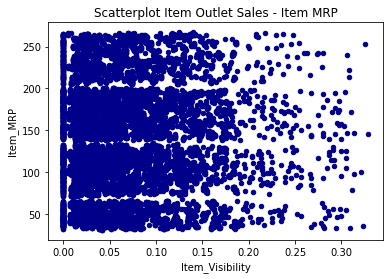

In [171]:
data5.plot.scatter(x='Item_Visibility', y='Item_MRP', c='DarkBlue', title ="Scatterplot Item Outlet Sales - Item MRP")

Text(0.5, 1.0, 'Features Correlating with Item_Visibility')

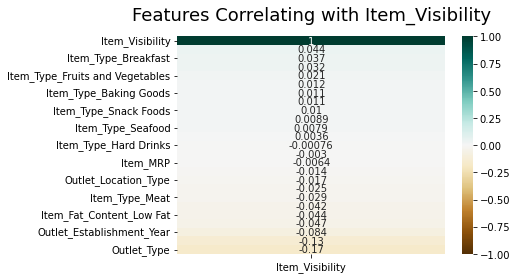

In [172]:
mapa_calor2 = sns.heatmap(data4.corr()[['Item_Visibility']].sort_values(by='Item_Visibility', ascending=False),vmin=-1, vmax=1, annot=True, cmap='BrBG')
mapa_calor2.set_title('Features Correlating with Item_Visibility', fontdict={'fontsize':18}, pad=16)